In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [2]:
# importing the dataset
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\iNeuron\\Assignments\\Dataset\\data_stocks.csv")

In [3]:
# first five rows of the dataset 
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
# converting timestamp to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], unit="s")

In [5]:
# dimensions of the dataset
print("Number of Stocks:",df.shape[1])
print("Number of Datapoints:",df.shape[0])

Number of Stocks: 502
Number of Datapoints: 41266


### Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance.

We shall measure similarity in performance by measuring the stock's returns during the given period.

In [6]:
# function to calculate stock return
def total_return(prices):
    return (prices.iloc[-1]/prices.iloc[0] - 1)*100

In [7]:
# calculating stock returns
returns = pd.DataFrame(total_return(df.iloc[:,1:]), columns = ["Total Returns"])
returns

,Total Returns
SP500,4.564200
NASDAQ.AAL,5.693362
NASDAQ.AAPL,14.128619
NASDAQ.ADBE,19.694515
NASDAQ.ADI,2.011214
...,...
NYSE.XRX,338.451087
NYSE.XYL,23.596177
NYSE.YUM,20.278735
NYSE.ZBH,-6.327869


In [8]:
# creating an array to pass it to the clustering algorithm
X = returns.values

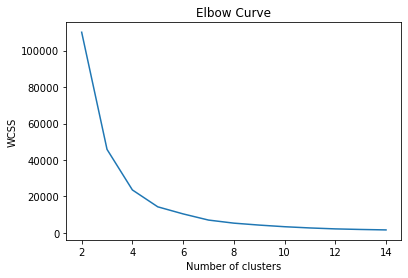

In [9]:
# kmeans clustering algorithm with various values of k's
wcss = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_) 

# plotting a scree plot to check the best k value
plt.plot(range(2,15), wcss)
plt.title("Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see an elbow forming at k = 7 and the point thereafter is comparatively smoother.

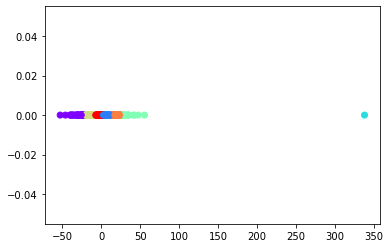

In [10]:
# kmeans with k = 7
kmeans = KMeans(n_clusters = 7).fit(X)

# cluster centroid location
centroids = kmeans.cluster_centers_

# plotting the clusters
plt.scatter(X[:,0], np.zeros_like(X),c = kmeans.labels_, cmap ="rainbow") 

We notice an outlier far to the right. Let's delete it to better visualize the formed clusters.

In [11]:
# finding the outlier with maximum return
returns.idxmax()

# removing the outlier
returns.drop('NYSE.XRX', inplace=True, axis=0)

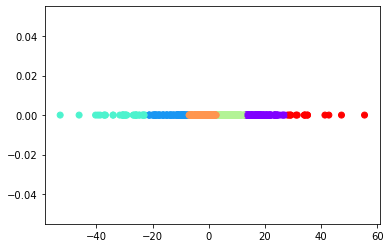

In [12]:
# recomputing and plotting the clusters
X = returns.values
kmeans = KMeans(n_clusters = 6).fit(X) # reducing k as one cluster centroid was assigned to the outlier
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0], np.zeros_like(X),c = kmeans.labels_, cmap ="rainbow") 

In [13]:
# adding a new column with labels
returns["Cluster Number"] = kmeans.labels_
returns.head()

,Total Returns,Cluster Number
SP500,4.564200,3
NASDAQ.AAL,5.693362,3
NASDAQ.AAPL,14.128619,0
NASDAQ.ADBE,19.694515,0
NASDAQ.ADI,2.011214,4


Text(0.5, 1.0, 'Stocks grouped based on performance')

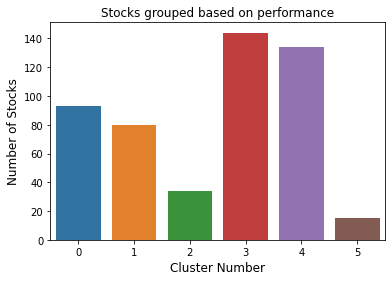

In [14]:
sns.countplot(x = "Cluster Number", data = returns)
plt.xlabel('Cluster Number',fontsize=12)
plt.ylabel('Number of Stocks',fontsize=12)
plt.title('Stocks grouped based on performance')

In [15]:
# stock wise cluster label
returns.reset_index(inplace=True)
returns.columns = ["Stock Name", "Total Returns", "Cluster Number"]
returns.loc[:,["Stock Name","Cluster Number"]].groupby(by=["Cluster Number","Stock Name"]).count()

Empty DataFrame
Columns: []
Index: [(0, NASDAQ.AAPL), (0, NASDAQ.ADBE), (0, NASDAQ.ALXN), (0, NASDAQ.AMAT), (0, NASDAQ.AVGO), (0, NASDAQ.BIIB), (0, NASDAQ.CBOE), (0, NASDAQ.CERN), (0, NASDAQ.CHTR), (0, NASDAQ.CTSH), (0, NASDAQ.EQIX), (0, NASDAQ.ETFC), (0, NASDAQ.EXPE), (0, NASDAQ.FB), (0, NASDAQ.GILD), (0, NASDAQ.GOOG), (0, NASDAQ.ILMN), (0, NASDAQ.INTU), (0, NASDAQ.LKQ), (0, NASDAQ.MCHP), (0, NASDAQ.MNST), (0, NASDAQ.MSFT), (0, NASDAQ.NFLX), (0, NASDAQ.SPLS), (0, NASDAQ.TROW), (0, NASDAQ.VRSN), (0, NASDAQ.WLTW), (0, NASDAQ.WYNN), (0, NASDAQ.XLNX), (0, NYSE.A), (0, NYSE.ABBV), (0, NYSE.ABT), (0, NYSE.AET), (0, NYSE.AFL), (0, NYSE.AME), (0, NYSE.AMT), (0, NYSE.ANTM), (0, NYSE.AON), (0, NYSE.APH), (0, NYSE.AVY), (0, NYSE.BAX), (0, NYSE.BF.B), (0, NYSE.C), (0, NYSE.CAT), (0, NYSE.CCI), (0, NYSE.CCL), (0, NYSE.CI), (0, NYSE.CNC), (0, NYSE.COO), (0, NYSE.CRM), (0, NYSE.DLPH), (0, NYSE.EL), (0, NYSE.ESS), (0, NYSE.EW), (0, NYSE.FIS), (0, NYSE.FMC), (0, NYSE.GPN), (0, NYSE.HBI), (0, NYSE.HRB), (0, NYSE.HUM), (0, NYSE.KMX), (0, NYSE.KSU), (0, NYSE.LMT), (0, NYSE.MA), (0, NYSE.MCD), (0, NYSE.MCO), (0, NYSE.NEE), (0, NYSE.NEM), (0, NYSE.NI), (0, NYSE.NOC), (0, NYSE.PGR), (0, NYSE.PKI), (0, NYSE.PLD), (0, NYSE.PRGO), (0, NYSE.PVH), (0, NYSE.RCL), (0, NYSE.RHT), (0, NYSE.RTN), (0, NYSE.SPGI), (0, NYSE.STT), (0, NYSE.STZ), (0, NYSE.TDG), (0, NYSE.TMO), (0, NYSE.TSO), (0, NYSE.UNH), (0, NYSE.V), (0, NYSE.VAR), (0, NYSE.VFC), (0, NYSE.WAT), (0, NYSE.WYN), (0, NYSE.XYL), (0, NYSE.YUM), (0, NYSE.ZTS), (1, NASDAQ.AKAM), (1, NASDAQ.AMD), (1, NASDAQ.CHRW), (1, NASDAQ.DISH), (1, NASDAQ.FAST), (1, NASDAQ.FFIV), (1, NASDAQ.FOX), ...]

[500 rows x 0 columns]

### Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

To find stocks that are similar based on fluctutations in price we can calculate the volatility of the stock.

In [16]:
# calculating log returns 
log_returns = np.log(df.iloc[:,1:]/df.iloc[:,1:].shift(1))

In [17]:
# filling NaN values with 0
log_returns.fillna(0, inplace=True)

In [18]:
# calculating volatility
volatility = log_returns.rolling(window=41266).std()*np.sqrt(252)
volatility.shape

(41266, 501)

In [19]:
volatility = pd.DataFrame(volatility.T.iloc[:,-1])
volatility.columns = ["Price Volatility"]
volatility.head()

,Price Volatility
SP500,0.003567
NASDAQ.AAL,0.014348
NASDAQ.AAPL,0.009810
NASDAQ.ADBE,0.009643
NASDAQ.ADI,0.012357


In [20]:
# creating an array to pass it to the clustering algorithm
X = volatility.values
X = X.reshape(-1, 1)
X[:5]

array([[0.00356667],
       [0.01434816],
       [0.00980975],
       [0.00964251],
       [0.0123574 ]])

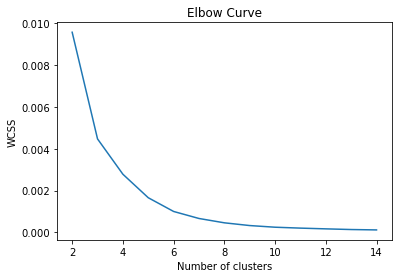

In [21]:
# kmeans clustering algorithm with various values of k's
wcss = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_) 

# plotting a scree plot to check the best k value
plt.plot(range(2,15), wcss)
plt.title("Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see an elbow forming at k = 7 and the point thereafter is comparatively smoother.

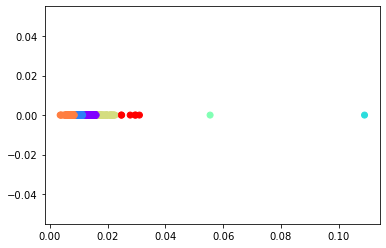

In [22]:
# kmeans with k = 7
kmeans = KMeans(n_clusters = 7).fit(X)

# cluster centroid location
centroids = kmeans.cluster_centers_

# plotting the clusters
plt.scatter(X[:,0], np.zeros_like(X),c = kmeans.labels_, cmap ="rainbow") 

We can see that we have two extreme outliers. Removing them to better visualize our clusters.

In [23]:
# finding the outliers
volatility.nlargest(5, "Price Volatility")

# removing the outliers
volatility.drop(['NYSE.XRX', 'NYSE.BLL'] , inplace=True, axis=0)

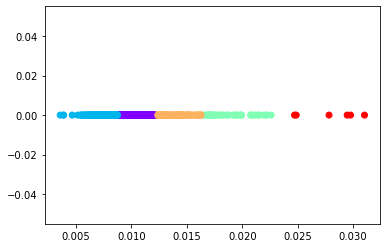

In [24]:
# recomputing and plotting the clusters
X = volatility.values
X = X.reshape(-1, 1)
kmeans = KMeans(n_clusters = 5).fit(X) # reducing k as two cluster centroids were assigned to the outliers
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0], np.zeros_like(X),c = kmeans.labels_, cmap ="rainbow") 

In [25]:
# adding a new column with labels
volatility["Cluster Number"] = kmeans.labels_
volatility.head()

,Price Volatility,Cluster Number
SP500,0.003567,1
NASDAQ.AAL,0.014348,3
NASDAQ.AAPL,0.009810,0
NASDAQ.ADBE,0.009643,0
NASDAQ.ADI,0.012357,3


Text(0.5, 1.0, 'Stocks grouped based on Volatility')

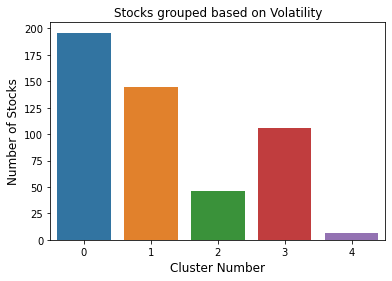

In [26]:
sns.countplot(x = "Cluster Number", data = volatility)
plt.xlabel('Cluster Number',fontsize=12)
plt.ylabel('Number of Stocks',fontsize=12)
plt.title('Stocks grouped based on Volatility')

In [27]:
# stock wise cluster label
volatility.reset_index(inplace=True)
volatility.columns = ["Stock Name", "Price Volatility", "Cluster Number"]
volatility.loc[:,["Stock Name","Cluster Number"]].groupby(by=["Cluster Number","Stock Name"]).count()

Empty DataFrame
Columns: []
Index: [(0, NASDAQ.AAPL), (0, NASDAQ.ADBE), (0, NASDAQ.ADP), (0, NASDAQ.AMZN), (0, NASDAQ.BIIB), (0, NASDAQ.CELG), (0, NASDAQ.CERN), (0, NASDAQ.CHRW), (0, NASDAQ.CINF), (0, NASDAQ.CMCSA), (0, NASDAQ.COST), (0, NASDAQ.CSCO), (0, NASDAQ.CSX), (0, NASDAQ.CTAS), (0, NASDAQ.CTXS), (0, NASDAQ.EBAY), (0, NASDAQ.EQIX), (0, NASDAQ.EXPD), (0, NASDAQ.EXPE), (0, NASDAQ.FB), (0, NASDAQ.FLIR), (0, NASDAQ.FOX), (0, NASDAQ.GILD), (0, NASDAQ.GOOG), (0, NASDAQ.GOOGL), (0, NASDAQ.GRMN), (0, NASDAQ.HAS), (0, NASDAQ.HOLX), (0, NASDAQ.HSIC), (0, NASDAQ.IDXX), (0, NASDAQ.INTU), (0, NASDAQ.ISRG), (0, NASDAQ.JBHT), (0, NASDAQ.LKQ), (0, NASDAQ.MAR), (0, NASDAQ.MCHP), (0, NASDAQ.MNST), (0, NASDAQ.NTRS), (0, NASDAQ.PBCT), (0, NASDAQ.PCAR), (0, NASDAQ.PCLN), (0, NASDAQ.PYPL), (0, NASDAQ.QCOM), (0, NASDAQ.SBUX), (0, NASDAQ.SNPS), (0, NASDAQ.SRCL), (0, NASDAQ.TROW), (0, NASDAQ.TXN), (0, NASDAQ.VRSK), (0, NASDAQ.VRSN), (0, NASDAQ.WBA), (0, NASDAQ.WLTW), (0, NASDAQ.XRAY), (0, NYSE.A), (0, NYSE.ADM), (0, NYSE.AES), (0, NYSE.AGN), (0, NYSE.AIV), (0, NYSE.AIZ), (0, NYSE.ALB), (0, NYSE.ALLE), (0, NYSE.AMP), (0, NYSE.AMT), (0, NYSE.ANTM), (0, NYSE.BBT), (0, NYSE.BDX), (0, NYSE.BEN), (0, NYSE.BLK), (0, NYSE.BMY), (0, NYSE.BXP), (0, NYSE.C), (0, NYSE.CAG), (0, NYSE.CAT), (0, NYSE.CBG), (0, NYSE.CBS), (0, NYSE.CCI), (0, NYSE.CMI), (0, NYSE.COF), (0, NYSE.COL), (0, NYSE.COO), (0, NYSE.COP), (0, NYSE.CPB), (0, NYSE.CRM), (0, NYSE.CSRA), (0, NYSE.DAL), (0, NYSE.DE), (0, NYSE.DFS), (0, NYSE.DHI), (0, NYSE.DLR), (0, NYSE.DOV), (0, NYSE.DRI), (0, NYSE.DVA), (0, NYSE.DXC), (0, NYSE.EFX), (0, NYSE.EL), (0, NYSE.EMN), (0, NYSE.EMR), (0, NYSE.EOG), (0, NYSE.ESS), (0, NYSE.ETN), ...]

[499 rows x 0 columns]

### Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

Using log_returns to find stocks that are moving together and stocks that are different from each other.

In [28]:
X = np.array(log_returns.T)
X.shape

(501, 41266)

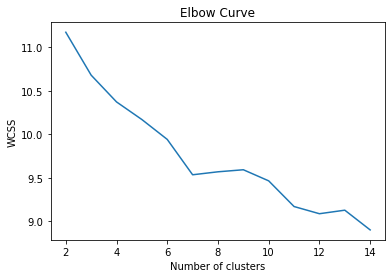

In [29]:
# kmeans clustering algorithm with various values of k's
wcss = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_) 

# plotting a scree plot to check the best k value
plt.plot(range(2,15), wcss)
plt.title("Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see an elbow forming at k = 12 and the point thereafter is comparatively smoother.

In [33]:
# kmeans with k = 12
kmeans = KMeans(n_clusters = 12).fit(X)

In [34]:
# creating a new df to group similar stocks
similar_stocks = pd.DataFrame(log_returns.T.iloc[:,0])
similar_stocks.drop(0, inplace=True, axis = 1)
similar_stocks["Cluster Number"] = kmeans.labels_
similar_stocks.reset_index(inplace=True)
similar_stocks.columns = ["Stock Name", "Cluster Number"]
similar_stocks.groupby(by=["Cluster Number","Stock Name"]).count()

Empty DataFrame
Columns: []
Index: [(0, NASDAQ.AAL), (0, NASDAQ.AAPL), (0, NASDAQ.ADBE), (0, NASDAQ.AKAM), (0, NASDAQ.ALXN), (0, NASDAQ.AMGN), (0, NASDAQ.AMZN), (0, NASDAQ.ATVI), (0, NASDAQ.BIIB), (0, NASDAQ.CA), (0, NASDAQ.CELG), (0, NASDAQ.CERN), (0, NASDAQ.CHTR), (0, NASDAQ.CMCSA), (0, NASDAQ.CSCO), (0, NASDAQ.CTSH), (0, NASDAQ.CTXS), (0, NASDAQ.DISH), (0, NASDAQ.EBAY), (0, NASDAQ.EXPE), (0, NASDAQ.FB), (0, NASDAQ.FFIV), (0, NASDAQ.GILD), (0, NASDAQ.GOOG), (0, NASDAQ.GOOGL), (0, NASDAQ.HOLX), (0, NASDAQ.IDXX), (0, NASDAQ.ILMN), (0, NASDAQ.INCY), (0, NASDAQ.INTC), (0, NASDAQ.INTU), (0, NASDAQ.MAR), (0, NASDAQ.MSFT), (0, NASDAQ.MYL), (0, NASDAQ.NFLX), (0, NASDAQ.PCLN), (0, NASDAQ.PYPL), (0, NASDAQ.QCOM), (0, NASDAQ.REGN), (0, NASDAQ.SNPS), (0, NASDAQ.SYMC), (0, NASDAQ.TRIP), (0, NASDAQ.VRSN), (0, NASDAQ.VRTX), (0, NASDAQ.WYNN), (0, NASDAQ.XRAY), (0, NYSE.ALK), (0, NYSE.CCL), (0, NYSE.CRM), (0, NYSE.DAL), (0, NYSE.GLW), (0, NYSE.GPN), (0, NYSE.HPE), (0, NYSE.HPQ), (0, NYSE.HRB), (0, NYSE.JNPR), (0, NYSE.LUV), (0, NYSE.MA), (0, NYSE.ORCL), (0, NYSE.RCL), (0, NYSE.RHT), (0, NYSE.TSS), (0, NYSE.UAL), (0, NYSE.V), (0, NYSE.WYN), (1, NYSE.XRX), (2, NYSE.APA), (2, NYSE.APC), (2, NYSE.CHK), (2, NYSE.COG), (2, NYSE.COP), (2, NYSE.CXO), (2, NYSE.DVN), (2, NYSE.EOG), (2, NYSE.EQT), (2, NYSE.FCX), (2, NYSE.FTI), (2, NYSE.HAL), (2, NYSE.HES), (2, NYSE.HP), (2, NYSE.KMI), (2, NYSE.MRO), (2, NYSE.MUR), (2, NYSE.NBL), (2, NYSE.NFX), (2, NYSE.NOV), (2, NYSE.NRG), (2, NYSE.OKE), (2, NYSE.OXY), (2, NYSE.PXD), (2, NYSE.RIG), (2, NYSE.RRC), (2, NYSE.SLB), (2, NYSE.WMB), (2, NYSE.XEC), (3, NYSE.BLL), (4, NASDAQ.ADP), (4, NASDAQ.CBOE), (4, NASDAQ.CHRW), (4, NASDAQ.CINF), ...]

[501 rows x 0 columns]

Text(0.5, 1.0, 'Stocks grouped based on similar price movements')

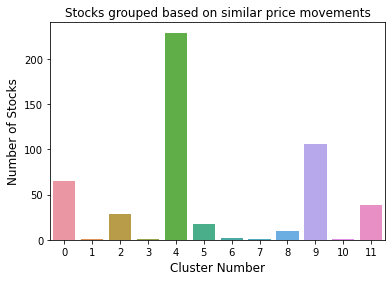

In [35]:
sns.countplot(x = "Cluster Number", data = similar_stocks)
plt.xlabel('Cluster Number',fontsize=12)
plt.ylabel('Number of Stocks',fontsize=12)
plt.title('Stocks grouped based on similar price movements')